In [2]:
import netCDF4 as nc
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import scipy
import plotly.express as px
from scipy.stats import mstats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import csv

In [3]:
#loading in dataset and isolation regions from hierarchy ID file
fn = "/Users/danielblanco/Documents/Mortality_Project/data/2_projection/3_impacts/main_specification/raw/single/rcp85/CCSM4/low/SSP3/Agespec_interaction_GMFD_POLY-4_TINV_CYA_NW_w1-oldest-aggregated.nc4"
fn1 = "/Users/danielblanco/Documents/Mortality_Project/data/2_projection/3_impacts/main_specification/raw/single/rcp85/CCSM4/low/SSP3/Agespec_interaction_GMFD_POLY-4_TINV_CYA_NW_w1-oldest-histclim-aggregated.nc4"
regionID = pd.read_csv("/Users/danielblanco/Documents/Mortality_Project/RegionID.csv").drop_duplicates().reset_index()

#converting to xarray
ds = xr.open_dataset(fn)
ds1 = xr.open_dataset(fn1)
#converting to dataframe
df = ds.to_dataframe()
df1 = ds1.to_dataframe()
#isolating regions from Figure 4 of Carleton et al. (2022)
DEL = df.loc[df['regions'] =='IND.10.121']   #multiple versions for Dehli in aggregated version
OSL = df.loc[df['regions'] =='NOR.12']
CHI = df.loc[df['regions'] =='USA.14']        #listed as 'Cook' county
SPB = df.loc[df['regions'] =='BRA']  #double check aggregated version, unaggreagted version not listed as sao paulo
ACC = df.loc[df['regions'] =='GHA.5']
SYD = df.loc[df['regions'] =='AUS.4']    #unaggreageted version split into 
BEI = df.loc[df['regions'] == 'CHN.2']     #double check aggregated version, unaggregated version only has Miyun district
DEL1 = df1.loc[df['regions'] =='IND.10.121']
OSL1 = df1.loc[df['regions'] =='NOR.12']
CHI1 = df1.loc[df['regions'] =='USA.14']        
SPB1 = df1.loc[df['regions'] =='BRA']  
ACC1 = df1.loc[df['regions'] =='GHA.5']
SYD1 = df1.loc[df['regions'] =='AUS.4']    
BEI1 = df1.loc[df['regions'] == 'CHN.2']

In [11]:
#Difference between full income-full adaptation and Histclim
DELdiff = DEL['rebased']- DEL1['rebased']
OSLdiff = OSL['rebased'] - OSL1['rebased']
CHIdiff = CHI['rebased'] - CHI1['rebased']
SPBdiff = SPB['rebased'] - SPB1['rebased']
ACCdiff = ACC['rebased'] - ACC1['rebased']
SYDdiff = SYD['rebased'] - SYD1['rebased']
BEIdiff = BEI['rebased'] - BEI1['rebased']

#Taking 17th, 50th, and 83rd percentiles for all regions
DEL_diffrolling_17th = DELdiff.rolling(window=30, center = False).quantile(0.17)
DEL_diffrolling_83rd = DELdiff.rolling(window=30, center = False).quantile(0.83)
DEL_diffrolling_50th = DELdiff.rolling(window=30, center = False).quantile(0.50)
OSL_diffrolling_17th = OSLdiff.rolling(window=30, center = False).quantile(0.17)
OSL_diffrolling_83rd = OSLdiff.rolling(window=30, center = False).quantile(0.83)
OSL_diffrolling_50th = OSLdiff.rolling(window=30, center = False).quantile(0.50)
CHI_diffrolling_17th = CHIdiff.rolling(window=30, center = False).quantile(0.17)
CHI_diffrolling_83rd = CHIdiff.rolling(window=30, center = False).quantile(0.83)
CHI_diffrolling_50th = CHIdiff.rolling(window=30, center = False).quantile(0.50)
SPB_diffrolling_17th = SPBdiff.rolling(window=30, center = False).quantile(0.17)
SPB_diffrolling_83rd = SPBdiff.rolling(window=30, center = False).quantile(0.83)
SPB_diffrolling_50th = SPBdiff.rolling(window=30, center = False).quantile(0.50)
ACC_diffrolling_17th = ACCdiff.rolling(window=30, center = False).quantile(0.17)
ACC_diffrolling_83rd = ACCdiff.rolling(window=30, center = False).quantile(0.83)
ACC_diffrolling_50th = ACCdiff.rolling(window=30, center = False).quantile(0.50)
SYD_diffrolling_17th = SYDdiff.rolling(window=30, center = False).quantile(0.17)
SYD_diffrolling_83rd = SYDdiff.rolling(window=30, center = False).quantile(0.83)
SYD_diffrolling_50th = SYDdiff.rolling(window=30, center = False).quantile(0.50)
BEI_diffrolling_17th = BEIdiff.rolling(window=30, center = False).quantile(0.17)
BEI_diffrolling_83rd = BEIdiff.rolling(window=30, center = False).quantile(0.83)
BEI_diffrolling_50th = BEIdiff.rolling(window=30, center = False).quantile(0.50)




In [18]:
# Function to calculate meshgrid diff.

def fn_diff(Xvar,Yvar,step,quantile):
    tot_len=len(Xvar[0])
    diff=[]
    for ii in range(tot_len-step):
        if ii == (tot_len):
            break #break loop if it exceeds window.
        else:
            diff_var=Xvar[0+ii:ii+step,0+ii:ii+step] - Yvar[0+ii:ii+step,0+ii:ii+step]
            quant_diff = np.quantile(diff_var, quantile)
            diff.append(quant_diff)
    return diff

In [26]:
#creating np.meshgrid dataframe between full income/full adapt. and Histclim
xx,yy = np.meshgrid(SYD['rebased'],SYD1['rebased'])
step=30

diff17 = fn_diff(xx,yy,30,.17)
diff50 = fn_diff(xx,yy,30,.50)
diff83 = fn_diff(xx,yy,30,.83)


#stack all at once
Diff17 = np.vstack(diff17)
Diff50 = np.vstack(diff50)
Diff83 = np.vstack(diff83)

#creating dataframe to store results
data = pd.DataFrame()


data['17th_percentile'] = Diff17.flatten()
data['50th_percentile'] = Diff50.flatten()
data['83rd_percentile'] = Diff83.flatten()


data = data.reindex(data.index.tolist() + list(range(30))).shift(30)
data = data.reset_index()
data = data.iloc[:120]



In [27]:
#calculating where 83rd or 17th%-tile crosses x-axis
minimum_value = np.absolute(data['17th_percentile'])
intercept = minimum_value.argmin()
TOE_label = 1981 + intercept
intercept


50

NameError: name 'x' is not defined

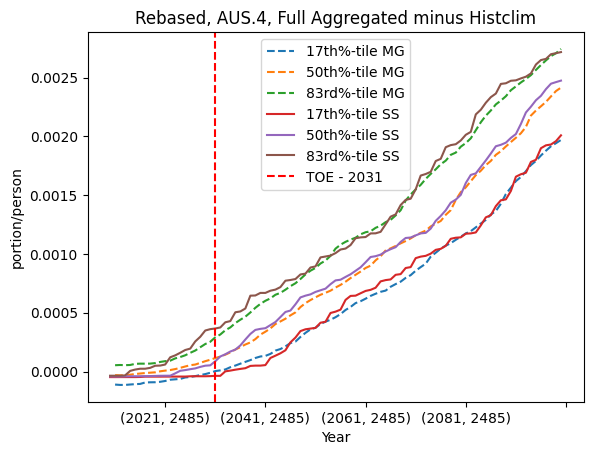

In [28]:
data['17th_percentile'].plot(label = "17th%-tile MG", linestyle = 'dashed')
data['50th_percentile'].plot(label = "50th%-tile MG",linestyle = 'dashed')
data['83rd_percentile'].plot(label = "83rd%-tile MG",linestyle = 'dashed')
SYD_diffrolling_17th.plot(label="17th%-tile SS")
SYD_diffrolling_50th.plot(label="50th%-tile SS")
SYD_diffrolling_83rd.plot(label="83rd%-tile SS")
plt.title("Rebased, AUS.4, Full Aggregated minus Histclim")
plt.ylabel("portion/person")
plt.xlabel("Year")
plt.axvline(x = intercept, linestyle='--',c='r' ,label = "TOE - " + str(TOE_label) )
#plt.axhline(y=0.000186, linestyle='--',c='g', label = "initial 83rd %-tile")
plt.legend()
plt.xticks(x, labels)

([<matplotlib.axis.XTick at 0x29165bc70>,
 [Text(39, 0, '2020'),
  Text(59, 0, '2040'),
  Text(79, 0, '2060'),
  Text(99, 0, '2080'),
  Text(119, 0, '2100')])

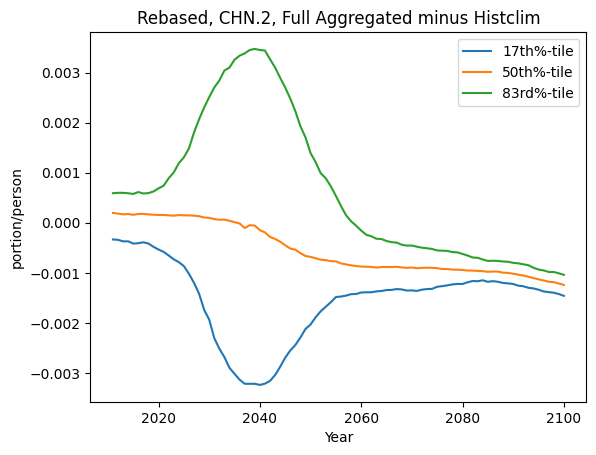

In [441]:
data['17th_percentile'].plot(label = "17th%-tile")
data['50th_percentile'].plot(label = "50th%-tile")
data['83rd_percentile'].plot(label = "83rd%-tile")
plt.title("Rebased, CHN.2, Full Aggregated minus Histclim")
plt.ylabel("portion/person")
plt.xlabel("Year")
#plt.axvline(x=95, linestyle='--',c='r' ,label = "TOE - 2076")
#plt.axhline(y=0.000186, linestyle='--',c='g', label = "initial 83rd %-tile")
plt.legend()
plt.xticks(x, labels)

In [261]:
# Extract the year and region info from xx
VAR=BEI_diffrolling_17th

BEI_idx=VAR.index.values.tolist()
BEI_year=[]
BEI_region=[]

for t in BEI_idx:
    BEI_year.append(t[0])
    BEI_region.append(t[1])

# Extract the "rebased" values
BEI_rebased=BEI_diffrolling_17th

In [264]:
# Focus on getting the lase column. Look at the nbk I sent over and see the `Extract the year and region info from xx` cell and see how yy_rebased` looks
BEI_rebased

year  region
1981  712            NaN
1982  712            NaN
1983  712            NaN
1984  712            NaN
1985  712            NaN
                  ...   
2096  712      -0.001409
2097  712      -0.001409
2098  712      -0.001466
2099  712      -0.001475
2100  712      -0.001475
Name: rebased, Length: 120, dtype: float64

In [236]:
# Function to calculate diff.
#
def fn_diff(Xvar,Yvar,step,quantile):
    tot_len=len(Xvar[0])
    diff=[]
    for ii in range(tot_len-step):
        if ii == (tot_len):
            break #break loop if it exceeds window.
        else:
            diff_var=Xvar[0+ii:ii+step,0+ii:ii+step] - Yvar[0+ii:ii+step,0+ii:ii+step]
            quant_diff = np.quantile(diff_var, quantile)
            diff.append(quant_diff)
    return diff

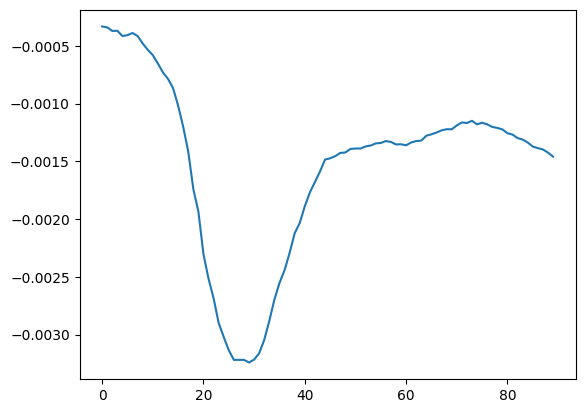

In [232]:
plt.plot(diff50)

In [174]:
def fu(IP1,IP2):
    do something
    return df_ptile1

array([-0.00120366, -0.00026045,  0.00576627])

In [ ]:
#titles and labels should be pulled from metadata
BEI_diffrolling_17th.plot(label="17th percentile")
BEI_diffrolling_50th.plot(label="50th percentile")
BEI_diffrolling_83rd.plot(label="83rd percentile")

x = [39,59,79,99,119]
labels = ['2020', '2040','2060','2080','2100']
plt.title("Rebased, CHN.2, Full Aggregated - Histclim")
plt.ylabel("portion/person")
plt.xlabel("Year")
#plt.axvline(x=95, linestyle='--',c='r' ,label = "TOE - 2076")
#plt.axhline(y=0.000186, linestyle='--',c='g', label = "initial 83rd %-tile")
plt.legend()
plt.xticks(x, labels)

